In [178]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [179]:
df = pd.read_csv('../data/datos_examen_ingles.csv')

df

,Speaking,Reading,Listening,Writing,Level
0,214,85,101,118,A1
1,216,106,224,167,A1
2,203,161,98,183,A1
3,139,124,145,126,A2
4,161,133,130,118,A1
...,...,...,...,...,...
1992,119,203,147,94,A1
1993,104,131,82,221,A1
1994,208,105,128,175,A1
1995,225,217,130,209,A2


In [180]:
df = df.drop_duplicates()

df.describe()

,Speaking,Reading,Listening,Writing
count,1997.000000,1997.000000,1997.000000,1997.000000
mean,155.803205,156.022033,153.937907,156.227842
std,43.268929,43.194015,43.722391,43.643811
min,80.000000,80.000000,80.000000,80.000000
25%,119.000000,119.000000,116.000000,119.000000
50%,157.000000,156.000000,154.000000,157.000000
75%,194.000000,194.000000,191.000000,193.000000
max,230.000000,230.000000,230.000000,230.000000


In [181]:
indices_a_eliminar = df[df['Level'] == 'A1'].index[:997]
df = df.drop(indices_a_eliminar)

In [182]:
def show_graphs(df: pd.DataFrame):
    num_col = [col for col in df.columns if(df[col].dtype in ['int64','float64'])]

    ncols = 2
    nrows = len(num_col)

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5*nrows))

    for r in range(nrows):
        row = num_col[r]
        
        
        sns.histplot(x=df[row], ax=axes[r,0], color='#F8766D', label='Histograma' , fill =True )
        
        sns.boxplot(x=df[row], ax=axes[r,1], color='#00BFC4', orient = "h")
        
        axes[r,0].title.set_text("Histogram")
        axes[r,1].title.set_text("Box Plot")

    fig.tight_layout()
    plt.show()

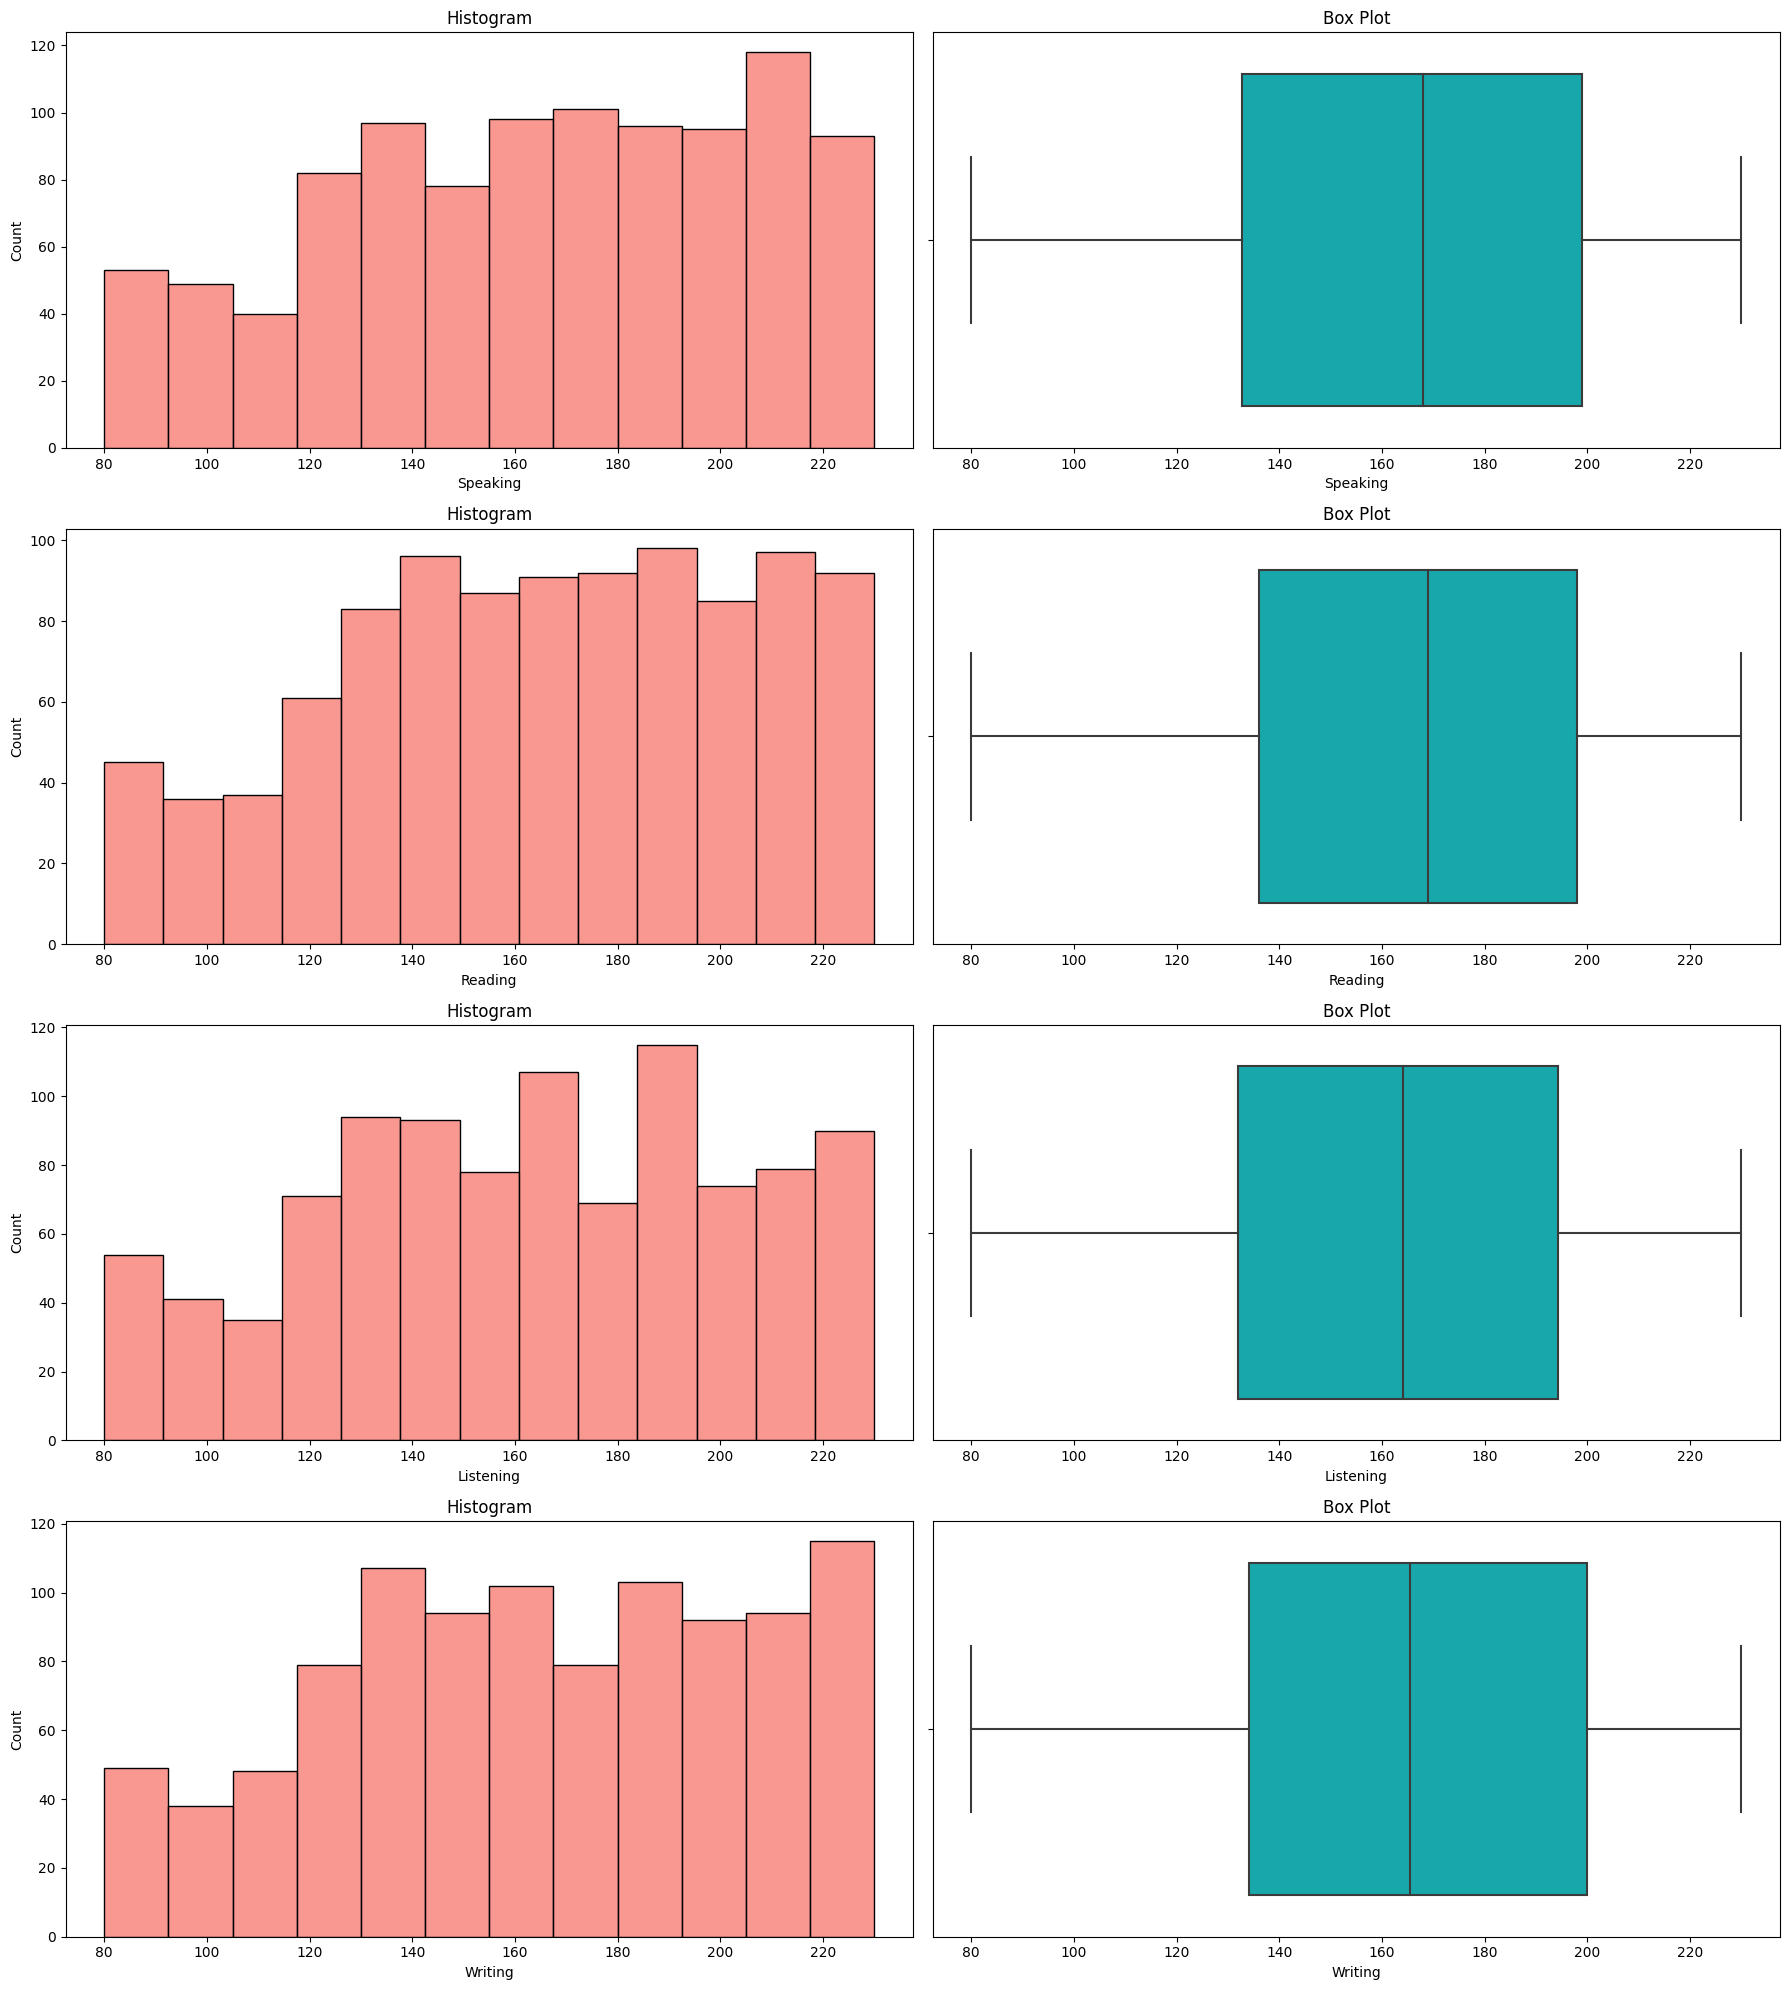

In [183]:
show_graphs(df)

In [184]:
low_cardinal_columns = [col for col in df.columns if(df[col].nunique()<10)]

def pies(col):
    print(f'{col}')
    col = df[col].value_counts().sort_values(ascending=False)
    fig = px.pie(values=col.values,
                 names=col.index,
                 color_discrete_sequence=px.colors.sequential.PuBu,
                 template='plotly_dark',
                 width=750, height=500,
                 )
    fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                      marker=dict(line=dict(color='#100000', width=0.2)))

    fig.data[0].marker.line.width = 2
    fig.data[0].marker.line.color = 'gray'
    fig.show()

for col in low_cardinal_columns:
  pies(col)

Level


### Entrenamiento de la red neuronal

In [185]:
X = df.iloc[:, 0:4]
y = df['Level']

X

,Speaking,Reading,Listening,Writing
3,139,124,145,126
8,215,154,190,153
9,198,172,141,223
12,148,176,204,162
15,169,205,129,170
...,...,...,...,...
1992,119,203,147,94
1993,104,131,82,221
1994,208,105,128,175
1995,225,217,130,209


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [192]:
clf = MLPClassifier(solver='adam', learning_rate='adaptive')
clf.fit(X_train, y_train)

y_pred = []
for index, row in X_test.iterrows():
    y_pred.append(clf.predict([row]))
    
    
accuracy_score(y_test, y_pred)

0.61

In [193]:
example_df = pd.DataFrame({'Speaking': [80], 'Reading': [80], 'Listening': [80], 'Writing': [80]}) #A1
example_df2 = pd.DataFrame({'Speaking': [150], 'Reading': [150], 'Listening': [150], 'Writing': [150]}) #B1


clf.predict(example_df2)

array(['B2'], dtype='<U2')